# Análise de dados eleitorais: 
### Análise por gênero e faixa etária
Análise de dados eleitorais de 2020 utilizando como principal assunto o gênero e faixa etária dos eleitores.

In [47]:
import pandas as pd
low_memory=False
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
file = r'C:\Users\Marcus\Desktop\Análise_de_Dados_Públicos\perfil_eleitorado_ATUAL.csv'
df = pd.read_csv(file, delimiter=';',
                 error_bad_lines=False, encoding='latin1')

In [3]:
df.shape

(4306904, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [5]:
df.sample(20)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
2347649,11/11/2020,21:20:42,9999,MG,48933,NOVA ERA,-1,#NULO#,193,4,FEMININO,9,DIVORCIADO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,1,1,0,0
1453272,11/11/2020,21:20:42,9999,GO,93734,GOIÂNIA,-1,#NULO#,1,2,MASCULINO,3,CASADO,8084,80 a 84 anos,5,ENSINO MÉDIO INCOMPLETO,14,14,1,0
1588497,11/11/2020,21:20:42,9999,MG,54275,VIÇOSA,-1,#NULO#,282,4,FEMININO,9,DIVORCIADO,2529,25 a 29 anos,7,SUPERIOR INCOMPLETO,3,2,0,0
3794747,11/11/2020,21:20:42,9999,SP,67679,NOVA LUZITÂNIA,-1,#NULO#,162,2,MASCULINO,5,VIÚVO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
147761,11/11/2020,21:20:42,9999,GO,93068,PEROLÂNDIA,-1,#NULO#,18,4,FEMININO,5,VIÚVO,9094,90 a 94 anos,1,ANALFABETO,1,1,0,0
2921023,11/11/2020,21:20:42,9999,MG,41971,CAETANÓPOLIS,-1,#NULO#,206,4,FEMININO,5,VIÚVO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
3138193,11/11/2020,21:20:42,9999,RO,655,CORUMBIARA,-1,#NULO#,16,4,FEMININO,3,CASADO,4044,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,10,10,0,0
3572103,11/11/2020,21:20:42,9999,MG,51136,RIO PIRACICABA,-1,#NULO#,150,2,MASCULINO,1,SOLTEIRO,8589,85 a 89 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,1,0
1244449,11/11/2020,21:20:42,9999,MG,44091,CRISTINA,-1,#NULO#,99,4,FEMININO,3,CASADO,9599,95 a 99 anos,5,ENSINO MÉDIO INCOMPLETO,1,0,0,0
3002013,11/11/2020,21:20:42,9999,SP,65595,ITAPUÍ,-1,#NULO#,241,4,FEMININO,1,SOLTEIRO,9999,100 anos ou mais,1,ANALFABETO,1,0,0,0


In [6]:
df.groupby('CD_GENERO')['DS_GENERO'].max()

CD_GENERO
0    NÃO INFORMADO
2        MASCULINO
4         FEMININO
Name: DS_GENERO, dtype: object

<AxesSubplot:title={'center':'Quantidade de eleitores por faixa etária em Jacareí '}, xlabel='Faixa Etária', ylabel='Quantidade de eleitores'>

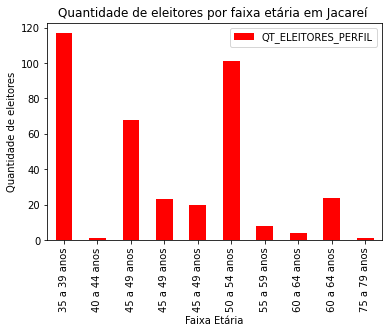

In [7]:
mun = df.query('NM_MUNICIPIO == "JACAREÍ"')
mun.tail(10).plot(kind='bar',
                 x='DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='RED', title='Quantidade de eleitores por faixa etária em Jacareí ', 
                  xlabel='Faixa Etária', ylabel='Quantidade de eleitores')

In [123]:
file = r'C:\Users\Marcus\Desktop\Análise_de_Dados_Públicos\perfil_eleitorado_ATUAL.csv'
df = pd.read_csv(file, delimiter=';',
                 error_bad_lines=False, encoding='latin1')

In [124]:
df.shape

(4306904, 21)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [126]:
df.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
666385,11/11/2020,21:20:42,9999,MG,42773,CARMO DA CACHOEIRA,-1,#NULO#,281,4,FEMININO,5,VIÚVO,6064,60 a 64 anos,2,LÊ E ESCREVE,3,1,0,0
1280653,11/11/2020,21:20:42,9999,DF,97012,BRASÍLIA,-1,#NULO#,3,4,FEMININO,3,CASADO,5559,55 a 59 anos,1,ANALFABETO,1,1,0,0
3922841,11/11/2020,21:20:42,9999,RS,87912,PELOTAS,-1,#NULO#,60,2,MASCULINO,3,CASADO,8589,85 a 89 anos,2,LÊ E ESCREVE,28,28,0,0
2495687,11/11/2020,21:20:42,9999,RS,89460,SÃO JOSÉ DO SUL,-1,#NULO#,31,2,MASCULINO,1,SOLTEIRO,1900,19 anos,5,ENSINO MÉDIO INCOMPLETO,6,6,0,0
1403026,11/11/2020,21:20:42,9999,MS,90573,CASSILÂNDIA,-1,#NULO#,3,4,FEMININO,3,CASADO,2124,21 a 24 anos,4,ENSINO FUNDAMENTAL COMPLETO,2,2,0,0
4285842,11/11/2020,21:20:42,9999,MS,90395,BATAYPORÃ,-1,#NULO#,5,4,FEMININO,1,SOLTEIRO,2124,21 a 24 anos,4,ENSINO FUNDAMENTAL COMPLETO,9,5,0,0
1865082,11/11/2020,21:20:42,9999,MG,42471,CAPETINGA,-1,#NULO#,127,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,2,2,0,0
13837,11/11/2020,21:20:42,9999,BA,35750,INHAMBUPE,-1,#NULO#,44,4,FEMININO,1,SOLTEIRO,6064,60 a 64 anos,8,SUPERIOR COMPLETO,13,13,0,0
587259,11/11/2020,21:20:42,9999,BA,34550,CÍCERO DANTAS,-1,#NULO#,82,2,MASCULINO,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
1506596,11/11/2020,21:20:42,9999,MG,49816,PEDRALVA,-1,#NULO#,99,2,MASCULINO,1,SOLTEIRO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,4,0,0,0


In [136]:
df.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].max().sort_values(ascending=False)

DS_GENERO
MASCULINO        6448
FEMININO         5487
NÃO INFORMADO     140
Name: QT_ELEITORES_PERFIL, dtype: int64

In [137]:
df.groupby('CD_GENERO')['DS_GENERO'].max()

CD_GENERO
0    NÃO INFORMADO
2        MASCULINO
4         FEMININO
Name: DS_GENERO, dtype: object

<AxesSubplot:ylabel='DS_GENERO'>

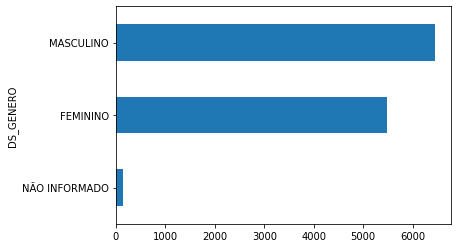

In [166]:
df.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].max().sort_values().plot(kind='barh')

<AxesSubplot:title={'center':'Faixa etária de eleitores em Caçapava'}, xlabel='DS_FAIXA_ETARIA'>

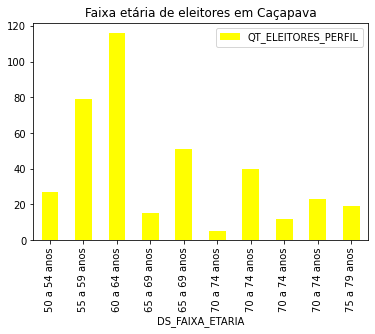

In [197]:
cpv = df.query('NM_MUNICIPIO == "CAÇAPAVA"')
cpv.tail(10).plot(kind='bar',title="Faixa etária de eleitores em Caçapava",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='YELLOW')

<AxesSubplot:title={'center':'Faixa etária de eleitores do gênero feminino em Caçapava'}, xlabel='DS_FAIXA_ETARIA'>

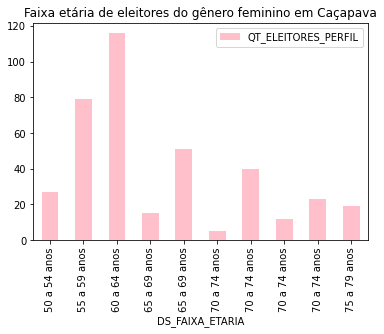

In [198]:
cpv = df.query('NM_MUNICIPIO == "CAÇAPAVA"')
cpv1 = cpv.query('DS_GENERO == "FEMININO"')
cpv1.tail(10).plot(kind='bar', title="Faixa etária de eleitores do gênero feminino em Caçapava",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='PINK')

<AxesSubplot:title={'center':'Faixa etária de eleitores do gênero masculino em Caçapava'}, xlabel='DS_FAIXA_ETARIA'>

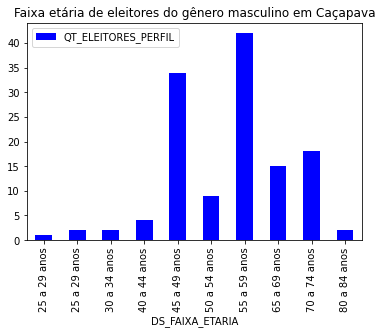

In [199]:
cpv = df.query('NM_MUNICIPIO == "CAÇAPAVA"')
cpv1 = cpv.query('DS_GENERO == "MASCULINO"')
cpv1.tail(10).plot(kind='bar', title="Faixa etária de eleitores do gênero masculino em Caçapava",
        x= 'DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='BLUE')